In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from fiona.crs import from_epsg

In [2]:
graph_path= r"M:\NY4P Metrics Research 18034\05_GRAPHICS\Charts Graphs Diagrams"

# Answers question about outliers: Superparks

In [3]:
cbs= gpd.read_file(r"S:\NYC_GIS_DATA\community districts\nycd.shp")

In [4]:
ntas= gpd.read_file(r"S:\NYC_GIS_DATA\DCP Neighborhood Tabulation Areas\nynta.shp")

In [5]:
path_parks= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\Parks Events Listing\190513_download'

In [6]:
event= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Listing.csv'))
orgs= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Organizers.csv'))
loc= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Locations.csv'))
cats= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Categories.csv'))

In [7]:
event['event_id'].unique().shape

(74880,)

In [8]:
orgs['event_id'].unique().shape

(85503,)

In [9]:
loc['event_id'].unique().shape

(92276,)

In [10]:
cats['event_id'].unique().shape

(91715,)

In [11]:
from shapely.geometry import Point

In [12]:
event2= pd.merge(event, loc, on='event_id', how='left')
event.shape

(74880, 15)

In [13]:
event2['event_id'].unique().shape

(74880,)

In [14]:
loc[loc['event_id'].duplicated()].sort_values('event_id')

,event_id,name,park_id,lat,long,address,zip,borough,accessible
57458,62694,Isham Memorial Benches,M043,40.870050,-73.917781,NaN,NaN,M,NaN
71092,62809,McGuire Fields at Avenue W,B166D,40.619099,-73.900101,NaN,NaN,B,1.0
37648,62809,Bocce Courts,X039,40.861599,-73.794502,South of Orchard Beach Parking Lot,NaN,X,1.0
35400,62809,Floyd Bennett Field at Runway parallel to Flat...,NaN,40.593800,-73.900703,NaN,NaN,B,1.0
52820,62809,Cunningham Park at 75th Ave.,Q021,40.737202,-73.762802,NaN,NaN,Q,1.0
60558,62809,Van Cortlandt Park at West 260th Street,X092,40.907398,-73.896698,NaN,NaN,X,NaN
72327,62822,Mosholu Golf Course,X092,40.889900,-73.890800,NaN,10471.0,X,NaN
95300,62823,Mosholu Golf Course,X092,40.889900,-73.890800,NaN,10471.0,X,NaN
72071,62824,Mosholu Golf Course,X092,40.889900,-73.890800,NaN,10471.0,X,NaN
53548,62825,Van Cortlandt Park,X092,40.891602,-73.892899,NaN,NaN,X,NaN


In [15]:
event2[event2['event_id']==71741]

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,url,notice,name,park_id,lat,long,address,zip,borough,accessible
1965,71741,It's My Park Day at Fort Tryon Park,05/19/2013,10:00,14:00,NaN,"On It&#39;s My Park Day, join the Friends Comm...","On It's My Park Day, join the Friends Committe...",(212) 769-2300,mkleinnyc@rcn.com,...,its-my-park-day-at-fort-tryon-park,0,190th Street Subway Terrace,M029,40.858898,-73.934175,NaN,10040.0,M,0.0
1966,71741,It's My Park Day at Fort Tryon Park,05/19/2013,10:00,14:00,NaN,"On It&#39;s My Park Day, join the Friends Comm...","On It's My Park Day, join the Friends Committe...",(212) 769-2300,mkleinnyc@rcn.com,...,its-my-park-day-at-fort-tryon-park,0,Jacob Javits Playground,M029,40.859001,-73.934898,NaN,10040.0,M,NaN


In [16]:
event2['geometry']= [Point(p) for p in event2[['long', 'lat']].itertuples(index=False)]

In [17]:
event2= gpd.GeoDataFrame(event2, crs=from_epsg(2263))

In [18]:
event2.crs
event2.crs= from_epsg(4326)
event2263= event2.to_crs(epsg=2263)

In [19]:
latrange=[event2263['lat'].min(),event2263['lat'].max()]
longrange = [event2263['long'].min(),event2263['long'].max()]
event2263.index=event2263['lat']
event2263 = event2263.drop(latrange[1],axis=0)

In [20]:
parks= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\NYC_PARKS_DATA\NYCPARKS_ALLSITES.shp")
parks['geometry'].head()
parks.index = parks['SIGNNAME']

In [21]:
event2263['SIGNNAME']=event2263['name']
t= event2263.groupby(['borough','park_id']).agg({"event_id":'count'})

In [22]:
t.sort_values(['borough','event_id'])
t.rename(columns={'event_id':'Number of Events'},inplace=True)
t.head()

Number of Events
borough park_id                  
B       B001                    2
        B002                   16
        B003                   51
        B007                    7
        B008                   33

In [23]:
t.loc[:,'Average Number of Events per Year']= t.loc[:,'Number of Events']/6
superparks= t[t['Average Number of Events per Year']>50] #To calculate the superparks
parks.rename(columns={'GISPROPNUM':'park_id'},inplace=True)

In [24]:
parks.index= parks['park_id']
superparks.reset_index(inplace=True)

In [25]:
superjoin= superparks.join(parks,on='park_id',how='left',lsuffix='parks').sort_values('Number of Events',ascending=False)

In [26]:
superjoin.shape

(45, 20)

In [27]:
superparks.shape

(45, 4)

In [28]:
superparks;

In [29]:
superjoin

,borough,park_idparks,Number of Events,Average Number of Events per Year,park_id,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,ADDRESS,SIGNNAME,TYPECATEGO,WATERFRONT,NYS_ASSEMB,NYS_SENATE,US_CONGRES,geometry
7,M,M010,6486,1081.000000,M010,"5 Av To Central Park W, 59 St To 110 St","110, 111, 107, 105, 108, 106",6,18,"10023, 10024, 10025",M,840.010,1000 5 AVENUE,Central Park,Flagship Park,No,"69, 68, 67, 75",29,"10, 13",(POLYGON ((995951.7570963055 230838.4251838028...
6,M,M008,5930,988.333333,M008,"bet. 5 and 6 Av, W 40 St and W 42 St",105,4,14,10018,M,9.603,1060 6 Av,Bryant Park,Neighborhood Park,No,75,27,12,"POLYGON ((988842.0695440471 213608.4097751379,..."
38,X,X040,4542,757.000000,X040,Grand Concourse bet. E. 192 St. and E. K,207,15,52,10458,X,2.331,2640 GRAND CONCOURSE,Poe Park,Playground,No,78,33,13,"POLYGON ((1013455.227338642 254226.8062284738,..."
44,X,X209,2784,464.000000,X209,"W 248 St, Independence Av , W 252 St , P",208,11,50,10471,X,20.867,665 WEST 252 STREET,Wave Hill,Historic House Park,No,81,34,16,"POLYGON ((1008599.80594714 265804.3080078065, ..."
31,R,R006,2441,406.833333,R006,"Pittsville St., Hylan Blvd. Richard Ave.",503,51,123,"10307, 10309",R,286.382,298 SATERLEE STREET,Conference House Park,Nature Area,Yes,62,24,11,(POLYGON ((914157.4433230609 122605.7823975533...
2,B,B073,2341,390.166667,B073,"Prospect Park W, Parkside Ave. bet. Flatbush A...","306, 307, 314, 309, 308",39,78,11215,B,526.250,None,Prospect Park,Flagship Park,No,44,21,9,"POLYGON ((992901.9613586366 184065.3917615563,..."
5,B,B431,2103,350.500000,B431,"Furman St.,Water St. and John St. bet. Atlanti...","302, 306","1,33",84,"11201, 11201, 11201, 11201, 11201",B,21.377,None,Brooklyn Bridge Park,Community Park,Yes,52,26,7,(POLYGON ((983616.4710713923 191613.8989742249...
8,M,M029,1479,246.500000,M029,"Riverside Dr To Broadway, W 192 St To Dyckman St",112,10,34,10040,M,67.213,4565 BROADWAY,Fort Tryon Park,Community Park,No,71,31,13,(POLYGON ((1003238.322903723 252504.2716158032...
41,X,X092,1363,227.166667,X092,"NYC - Westchester County Line, Van Cortlandt P...","207, 208, 212",11,50,"10467, 10470, 10471, 10705, 10705",X,1146.430,3545 JEROME AVENUE,Van Cortlandt Park,Flagship Park,No,81,34,16,(POLYGON ((1014952.519947723 267799.2797396481...
10,M,M042,1193,198.833333,M042,"Dyckman St, Hudson River, Harlem River S",112,10,34,"10033, 10034",M,196.398,None,Inwood Hill Park,Community Park,Yes,72,31,13,(POLYGON ((1006117.340767726 256247.3471348882...


In [30]:
parks.shape

(1709, 16)

In [31]:
superjoin.sort_index(inplace=True)

In [32]:
#superjoin.to_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Superparks\superparks.csv")

In [33]:
superjoin

,borough,park_idparks,Number of Events,Average Number of Events per Year,park_id,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,ADDRESS,SIGNNAME,TYPECATEGO,WATERFRONT,NYS_ASSEMB,NYS_SENATE,US_CONGRES,geometry
0,B,B057,671,111.833333,B057,"Shore Pkwy., Avenue U, Filmore Ave. bet. Brigh...","315, 318","46,48",61,"11229, 11234, 11235",B,798.000,None,Marine Park,Community Park,Yes,59,22,"9, 8","(POLYGON ((1004097.446513548 152119.829012394,..."
1,B,B058,557,92.833333,B058,"N. 12 St., Lorimer St., Manhattan Ave. bet. Ba...",301,33,94,"11211, 11222",B,36.493,None,McCarren Park,Community Park,No,50,26,12,(POLYGON ((997297.9922647178 201754.3987063169...
2,B,B073,2341,390.166667,B073,"Prospect Park W, Parkside Ave. bet. Flatbush A...","306, 307, 314, 309, 308",39,78,11215,B,526.250,None,Prospect Park,Flagship Park,No,44,21,9,"POLYGON ((992901.9613586366 184065.3917615563,..."
3,B,B087,338,56.333333,B087,"41 St., 44 St., bet. 5 Ave. and 7 Ave.",307,38,72,11232,B,24.498,4200 5 AVENUE,Sunset Park,Community Park,No,51,17,7,"POLYGON ((983998.5992441326 175177.7468072325,..."
4,B,B126,343,57.166667,B126,"Halleck St., Bush St. bet. Otsego St. and Cour...",306,38,76,11231,B,58.503,825 HENRY STREET,Red Hook Recreation Area,Community Park,Yes,51,25,"10, 7",(POLYGON ((983301.0130408853 184028.0430829823...
5,B,B431,2103,350.500000,B431,"Furman St.,Water St. and John St. bet. Atlanti...","302, 306","1,33",84,"11201, 11201, 11201, 11201, 11201",B,21.377,None,Brooklyn Bridge Park,Community Park,Yes,52,26,7,(POLYGON ((983616.4710713923 191613.8989742249...
6,M,M008,5930,988.333333,M008,"bet. 5 and 6 Av, W 40 St and W 42 St",105,4,14,10018,M,9.603,1060 6 Av,Bryant Park,Neighborhood Park,No,75,27,12,"POLYGON ((988842.0695440471 213608.4097751379,..."
7,M,M010,6486,1081.000000,M010,"5 Av To Central Park W, 59 St To 110 St","110, 111, 107, 105, 108, 106",6,18,"10023, 10024, 10025",M,840.010,1000 5 AVENUE,Central Park,Flagship Park,No,"69, 68, 67, 75",29,"10, 13",(POLYGON ((995951.7570963055 230838.4251838028...
8,M,M029,1479,246.500000,M029,"Riverside Dr To Broadway, W 192 St To Dyckman St",112,10,34,10040,M,67.213,4565 BROADWAY,Fort Tryon Park,Community Park,No,71,31,13,(POLYGON ((1003238.322903723 252504.2716158032...
9,M,M037,506,84.333333,M037,"W 155 St and Dyckman St, Edgecombe Av & Amster...","110, 112",10,32,"10032, 10033, 10039, 10040, 10452",M,130.100,506 EDGECOMBE AVENUE,Highbridge Park,Community Park,Yes,72,31,13,(POLYGON ((1003030.633358464 247566.0639725626...


# Parks with more than 50 events per year, i.e. 'super parks'.

In [34]:
selsuperparks= superjoin[['park_id',\
                          'COMMUNITYB','COUNCILDIS','BOROUGH','ACRES',\
                          'SIGNNAME','WATERFRONT','TYPECATEGO',\
                          'Average Number of Events per Year']]
selsuperparks[['SIGNNAME','Average Number of Events per Year']].head(10)

,SIGNNAME,Average Number of Events per Year
0,Marine Park,111.833333
1,McCarren Park,92.833333
2,Prospect Park,390.166667
3,Sunset Park,56.333333
4,Red Hook Recreation Area,57.166667
5,Brooklyn Bridge Park,350.500000
6,Bryant Park,988.333333
7,Central Park,1081.000000
8,Fort Tryon Park,246.500000
9,Highbridge Park,84.333333


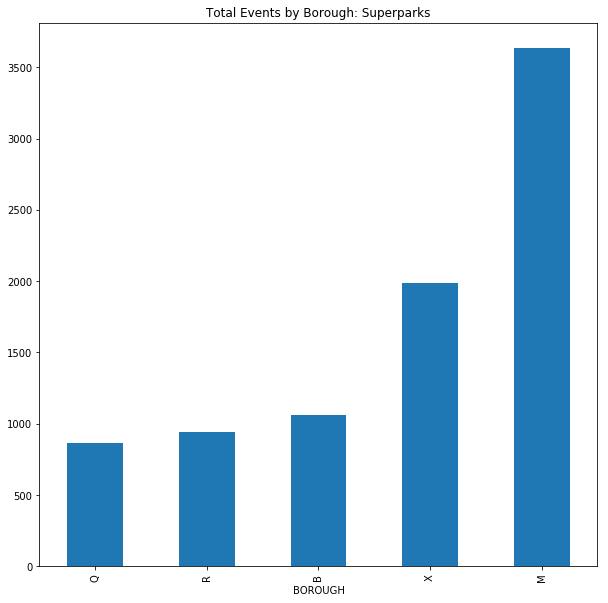

In [35]:
selsuperparks.groupby(['BOROUGH'])['Average Number of Events per Year'].sum().sort_values().plot(kind='bar')
plt.title('Total Events by Borough: Superparks')
fig= plt.gcf()
fig.set_size_inches(10,10)
plt.savefig(join(graph_path,'superparksbyborough.pdf'));

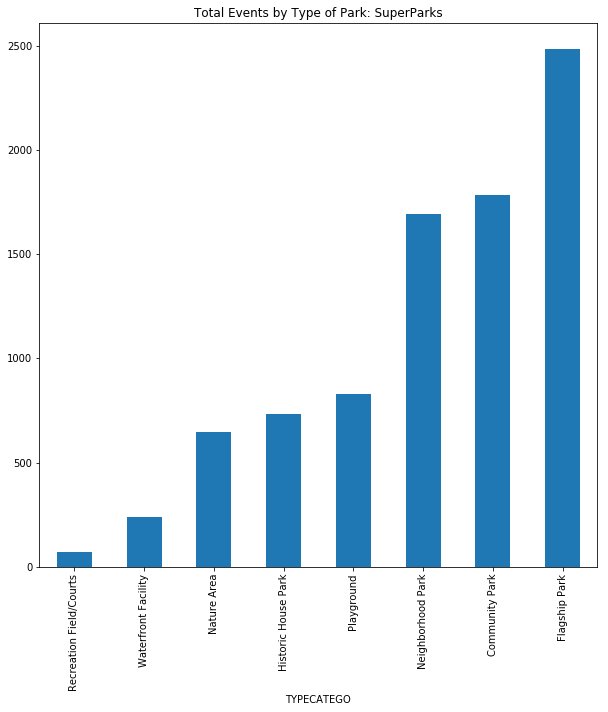

In [36]:
selsuperparks.groupby(['TYPECATEGO'])['Average Number of Events per Year'].sum().sort_values().plot(kind='bar')
plt.title('Total Events by Type of Park: SuperParks')
fig= plt.gcf()
fig.set_size_inches(10,10)
plt.savefig(join(graph_path,'superparksbytype.pdf'));

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


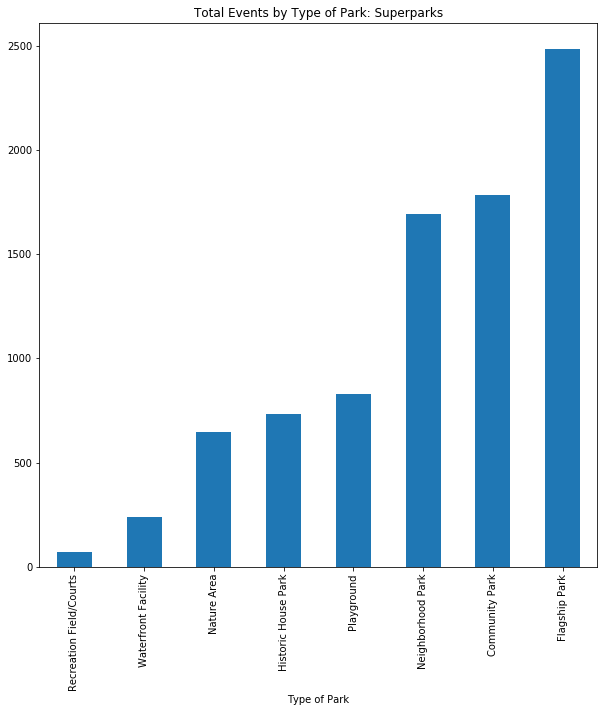

In [37]:
selsuperparks.rename(columns={'TYPECATEGO':'Type of Park'},inplace=True)
selsuperparks.groupby(['Type of Park'])['Average Number of Events per Year'].sum().sort_values().plot(kind='bar')
plt.title('Total Events by Type of Park: Superparks')
fig= plt.gcf()
fig.set_size_inches(10,10)
plt.savefig(join(graph_path,'superparksbytype.pdf'));

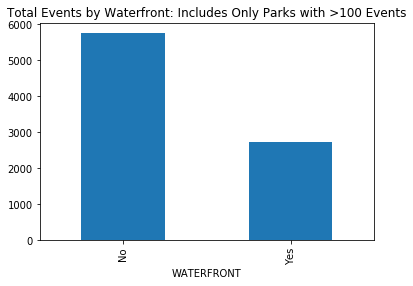

In [38]:
selsuperparks.groupby(['WATERFRONT'])['Average Number of Events per Year'].sum().plot(kind='bar')
plt.title('Total Events by Waterfront: Includes Only Parks with >100 Events');

# Answers question: when?

In [39]:
event.head()

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,cost_free,cost_description,must_see,url,notice
0,76690,Open Hours: Hallett Nature Sanctuary,10/29/2013,13:00,15:00,NaN,Normally closed to visitors except on guided t...,Normally closed to visitors except on guided t...,(212) 360-1461,hlook@centralparknyc.org,1,NaN,0,open-hours-hallett-nature-sanctuary,0
1,149886,Paper Arts and Crafts,08/19/2017,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,1,NaN,0,paper-arts-and-crafts,0
2,143835,It's My Park at Herbert Von King Park - Spring...,04/22/2017,08:00,12:00,NaN,<p>Please note: this event time was originally...,Volunteers will spruce up playground equipment...,(917) 297-2365,wmdkaos@aol.com,1,NaN,0,its-my-park-at-herbert-von-king-park-spring-cl...,0
3,162696,Summer on the Hudson: Yoga Flow,08/30/2018,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,1,NaN,0,summer-on-the-hudson-yoga-flow,0
4,164892,It's My Park at William Sheridan Playground,05/06/2018,10:00,14:00,NaN,"<p>This It&#39;s My Park season, volunteer wit...",Volunteer with Friends of William Sheridan to ...,NaN,delancey.nelson@parks.nyc.gov,1,NaN,0,its-my-park-at-william-sheridan-playground,0


In [40]:
event['date']= pd.to_datetime(event['date'], format='%m/%d/%Y')

In [41]:
pd.merge(event, cats, how='inner', on='event_id')

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,cost_free,cost_description,must_see,url,notice,name
0,76690,Open Hours: Hallett Nature Sanctuary,2013-10-29,13:00,15:00,NaN,Normally closed to visitors except on guided t...,Normally closed to visitors except on guided t...,(212) 360-1461,hlook@centralparknyc.org,1,NaN,0,open-hours-hallett-nature-sanctuary,0,Nature
1,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,1,NaN,0,paper-arts-and-crafts,0,Arts & Crafts
2,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,1,NaN,0,paper-arts-and-crafts,0,Best for Kids
3,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,1,NaN,0,paper-arts-and-crafts,0,Historic House Trust Sites
4,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,1,NaN,0,paper-arts-and-crafts,0,Poe Park Visitor Center
5,143835,It's My Park at Herbert Von King Park - Spring...,2017-04-22,08:00,12:00,NaN,<p>Please note: this event time was originally...,Volunteers will spruce up playground equipment...,(917) 297-2365,wmdkaos@aol.com,1,NaN,0,its-my-park-at-herbert-von-king-park-spring-cl...,0,Volunteer
6,143835,It's My Park at Herbert Von King Park - Spring...,2017-04-22,08:00,12:00,NaN,<p>Please note: this event time was originally...,Volunteers will spruce up playground equipment...,(917) 297-2365,wmdkaos@aol.com,1,NaN,0,its-my-park-at-herbert-von-king-park-spring-cl...,0,It's My Park
7,162696,Summer on the Hudson: Yoga Flow,2018-08-30,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,1,NaN,0,summer-on-the-hudson-yoga-flow,0,Fitness
8,162696,Summer on the Hudson: Yoga Flow,2018-08-30,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,1,NaN,0,summer-on-the-hudson-yoga-flow,0,Outdoor Fitness
9,162696,Summer on the Hudson: Yoga Flow,2018-08-30,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,1,NaN,0,summer-on-the-hudson-yoga-flow,0,Summer on the Hudson


In [42]:
event['event_id'].unique().shape

(74880,)

In [43]:
event.shape

(74880, 15)

In [44]:
pd.merge(event, cats, how='left', on='event_id').shape

(216101, 16)

In [45]:
pd.merge(event, cats, how='left', on='event_id')['event_id'].unique().shape

(74880,)

In [46]:
cats['event_id'].shape

(270353,)

In [47]:
event['event_id'].max()

179415

In [48]:
cats['event_id'].max()

179422

In [49]:
cats.sort_values('event_id').head()

,event_id,name
0,62223,Birding
1,62223,Nature
2,62224,Birding
3,62224,Nature
4,62225,Birding


In [50]:
event['dayofweek']= event['date'].dt.day_name()
event['year']= event['date'].dt.year
event['month']= event['date'].dt.month
event['week']= event['date'].dt.week

In [51]:
event.reset_index(inplace=True)

In [52]:
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
year=[2013,2014,2015,2016,2017,2018]
events=[]

In [53]:
for j in year:
    eventyear=[]
    for i in weekdays:
        eventyear += [event[(event['dayofweek']==i) & (event['year']==j)]['event_id'].value_counts().sum()/52]
    events += [eventyear]

In [54]:
event[event['dayofweek']=='Monday']['event_id'].value_counts().sum()

5334

In [55]:
events[0]

[16.634615384615383,
 27.846153846153847,
 27.115384615384617,
 30.78846153846154,
 26.384615384615383,
 54.48076923076923,
 31.615384615384617]

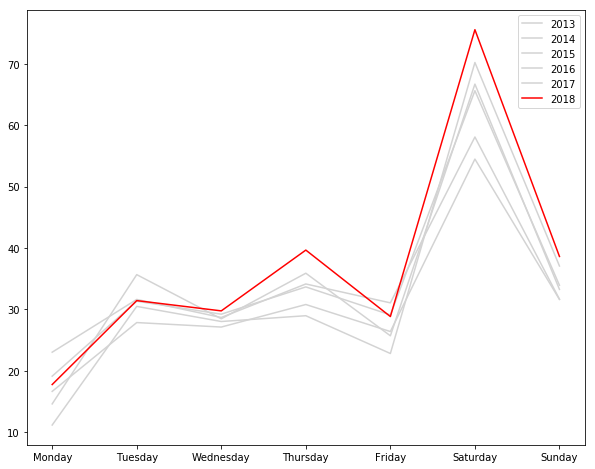

In [56]:
for i in range(len(year)):
    if i == 5:
        plt.plot(weekdays,events[i],label=str(year[i]),c='r')
    else:
        plt.plot(weekdays,events[i],label=str(year[i]),c='lightgrey')
plt.legend()
fig= plt.gcf()
fig.set_size_inches(10,8)
plt.savefig(join(graph_path,'EventsbyDoW.pdf'));

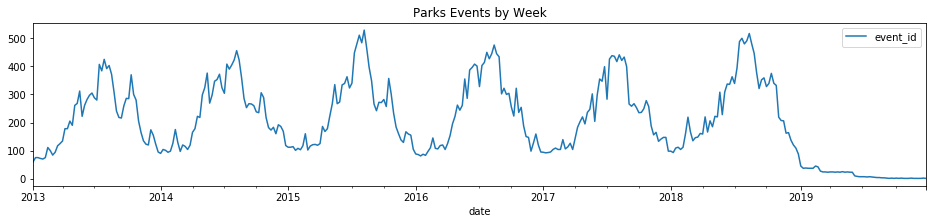

In [57]:
event.resample('W-Mon', on='date').agg({'event_id':'count'}).sort_values(by='date').plot(figsize=(16,3))
plt.title('Parks Events by Week')
fig= plt.gcf()
plt.savefig(join(graph_path,'timeseries.pdf'));
plt.show();

In [121]:
t= event.groupby(['year','title']).agg({'event_id':"count"}).sort_values(['year','event_id'],ascending=False).reset_index() #Compares events over time and by month.

In [163]:
buckets= [1,2,6,12,26,52,104,365]

In [141]:
t.head()

,year,title,event_id
0,2019,"City Parks Foundation Presents Yeti, Set, Snow...",92
1,2019,"Threads: Flax to Linen, Field to Fabric",91
2,2019,The Old Stone House: Witness to War,69
3,2019,Morning Fitness at Fort Tryon Park,65
4,2019,Shape Up Zumba with Pascal,52


In [142]:
x= t.groupby('year').agg({'event_id':sum})

In [143]:
x

,event_id
year,
2013,11173
2014,12388
2015,12581
2016,12492
2017,11892
2018,13602
2019,752


In [164]:
d={}
for i in range(len(buckets)):
    if i != 7:
        temp= pd.merge(x,t[(t['event_id']>buckets[i])&(t['event_id']<=buckets[i+1])].groupby('year').agg({'event_id':sum}).reset_index(),on='year')
        temp['per']=temp['event_id_y'] * 100/ temp['event_id_x']
        d["test{}_{}".format(buckets[i],buckets[i+1])]= temp

In [165]:
d["test2_6"][['year','per']]

,year,per
0,2013,9.737761
1,2014,8.144979
2,2015,8.616167
3,2016,10.926993
4,2017,10.166498
5,2018,11.902661
6,2019,1.196809


In [166]:
d["test6_12"][['year','per']]

,year,per
0,2013,10.122617
1,2014,9.186309
2,2015,11.779668
3,2016,11.327249
4,2017,10.570131
5,2018,8.307602
6,2019,6.250000


In [167]:
d["test12_26"][['year','per']]

,year,per
0,2013,13.469972
1,2014,15.127543
2,2015,15.388284
3,2016,17.058918
4,2017,18.045745
5,2018,14.019997
6,2019,41.622340


In [168]:
d["test26_52"][['year','per']]

,year,per
0,2013,16.709926
1,2014,20.059735
2,2015,17.351562
3,2016,17.347102
4,2017,18.995964
5,2018,16.129981
6,2019,6.914894


In [169]:
d["test52_104"][['year','per']]

,year,per
0,2013,10.086816
1,2014,7.620278
2,2015,10.690724
3,2016,8.397374
4,2017,8.131517
5,2018,9.667696
6,2019,42.154255


In [170]:
d["test104_365"][['year','per']]

,year,per
0,2013,19.010114
1,2014,18.412980
2,2015,8.369764
3,2016,9.005764
4,2017,6.828120
5,2018,14.909572


In [113]:
f= pd.merge(x,y,on='year')

In [114]:
f

,year,event_id_x,event_id_y
0,2013,11173,9214
1,2014,12388,10265
2,2015,12581,10084
3,2016,12492,9914
4,2017,11892,9294
5,2018,13602,10841
6,2019,752,738


In [117]:
f['per']=f['event_id_y']*100/f['event_id_x']

In [120]:
f[['year','per']]

,year,per
0,2013,82.466661
1,2014,82.862448
2,2015,80.152611
3,2016,79.362792
4,2017,78.153380
5,2018,79.701514
6,2019,98.138298


In [59]:
t= event.groupby(['year','week','title']).agg({'event_id':"count"}).reset_index()
t= t[t['year']!=2019]

In [60]:
temp= t[t['event_id']>1]
temp2= t[t['event_id']==1]

In [61]:
t= temp.groupby('week').agg({'event_id':sum})

In [62]:
t

,event_id
week,
1,337
2,297
3,267
4,273
5,276
6,293
7,417
8,402
9,324


In [63]:
t['average']=t['event_id']/6

In [64]:
t= t.reset_index()

In [65]:
t2 = temp2.groupby('week').agg({'event_id':sum})

In [66]:
t2['average']=t2['event_id']/6

In [67]:
t2= t2.reset_index()

In [68]:
t3= pd.merge(t,t2,on='week')

In [69]:
t3.drop(52,inplace=True)

In [70]:
t3

,week,event_id_x,average_x,event_id_y,average_y
0,1,337,56.166667,204,34.000000
1,2,297,49.500000,268,44.666667
2,3,267,44.500000,299,49.833333
3,4,273,45.500000,311,51.833333
4,5,276,46.000000,309,51.500000
5,6,293,48.833333,354,59.000000
6,7,417,69.500000,441,73.500000
7,8,402,67.000000,446,74.333333
8,9,324,54.000000,307,51.166667
9,10,345,57.500000,344,57.333333


In [71]:
t3['Average Number of Repeating Events']=t3['average_x']
t3['Average Number of Non-repeating Events']=t3['average_y']

In [72]:
t3['Total']= t3['Average Number of Repeating Events'] + t3['Average Number of Non-repeating Events']

In [73]:
t3['Percentage Repeating Events']=t3['Average Number of Repeating Events']*100/t3['Total']

In [74]:
t3['Percentage Non-repeating Events']=t3['Average Number of Non-repeating Events']*100/t3['Total']

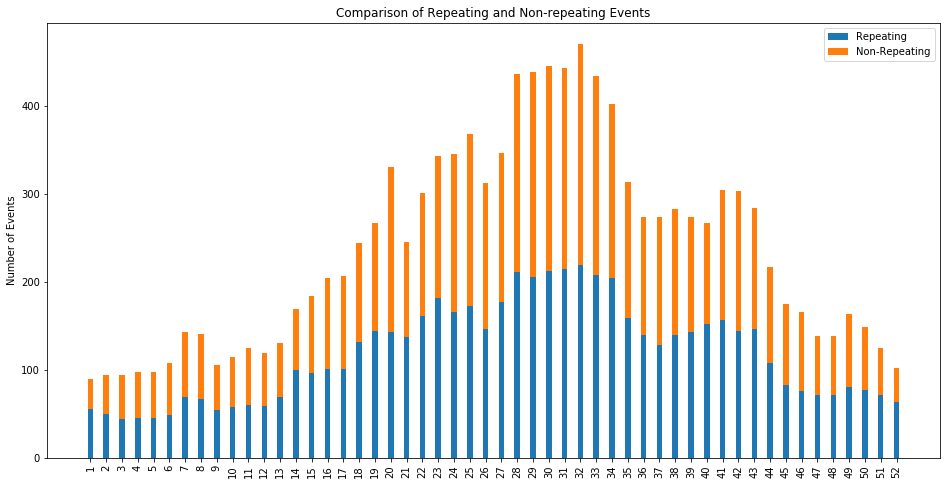

In [75]:
N = 52
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, t3['Average Number of Repeating Events'], width)
p2 = plt.bar(ind, t3['Average Number of Non-repeating Events'], width,bottom=t3['Average Number of Repeating Events'])

plt.ylabel('Number of Events')
plt.title('Comparison of Repeating and Non-repeating Events')
plt.xticks(ind,t3['week'],rotation='vertical')
plt.legend((p1[0], p2[0]), ('Repeating', 'Non-Repeating'))

fig= plt.gcf()
fig.set_size_inches(16,8)
plt.savefig(join(graph_path,'barduplicates.pdf'))

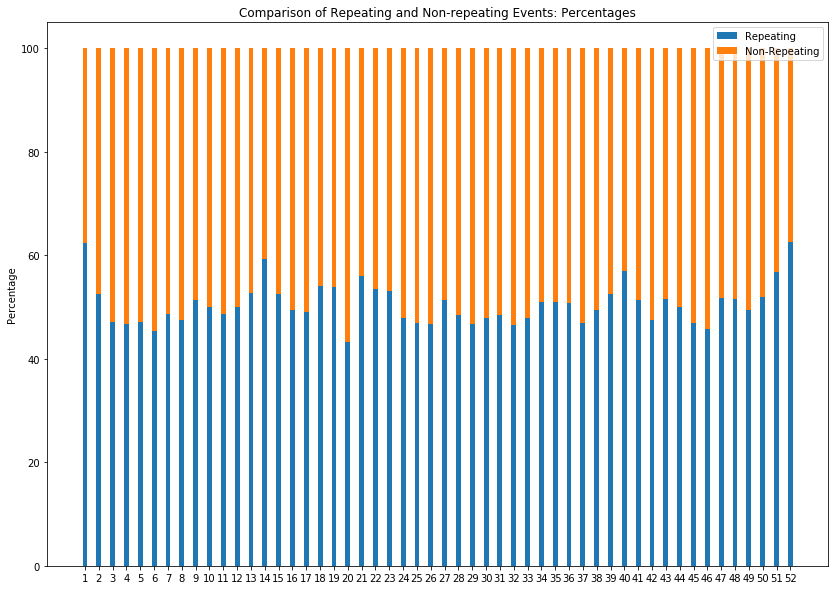

In [76]:
N = 52
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, t3['Percentage Repeating Events'], width)
p2 = plt.bar(ind, t3['Percentage Non-repeating Events'], width,bottom=t3['Percentage Repeating Events'])

plt.ylabel('Percentage')
plt.title('Comparison of Repeating and Non-repeating Events: Percentages')
plt.xticks(ind,t3['week'])
plt.legend((p1[0], p2[0]), ('Repeating', 'Non-Repeating'))

fig= plt.gcf()
fig.set_size_inches(14,10)
plt.savefig(join(graph_path,'barperduplicates2.pdf'))